In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as sts

ARQ = '../data/raw/Churn.csv'

df = pd.read_csv(ARQ,
                sep = ';',
                decimal = ',',
                encoding = 'latin1'
)

df.head()

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [7]:
df.shape

(999, 12)

In [9]:
df.columns = ['id', 'score', 'estado', 'genero', 'idade', 'patrimonio', 'saldo', 'produtos','tem_cartao_credito', 'ativo', 'salario', 'saiu']
df.head()

,id,score,estado,genero,idade,patrimonio,saldo,produtos,tem_cartao_credito,ativo,salario,saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [ ]:
agrupado = df.groupby('estado').size()
agrupado
# É para ter apenas estados do sul. 'RP' e 'TD' não existem.

estado
PR    257
RP      1
RS    478
SC    258
SP      4
TD      1
dtype: int64

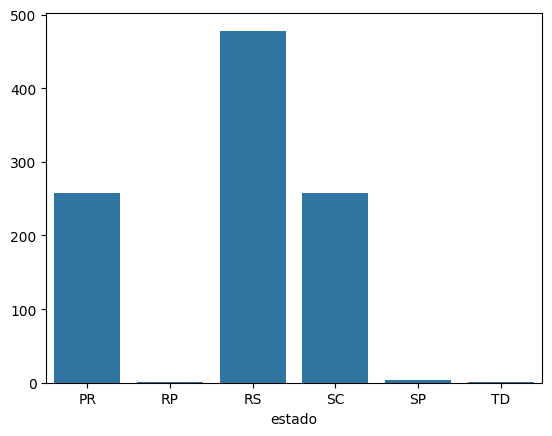

In [27]:
sns.barplot(x=agrupado.index, y=agrupado.values)
plt.show()

In [ ]:
agrupado = df.groupby(['genero']).size()
agrupado
# Muitas variações para masculino e feminino.

genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

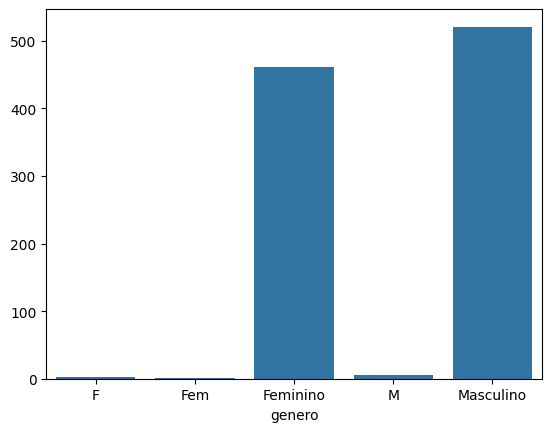

In [29]:
sns.barplot(x=agrupado.index, y=agrupado.values)
plt.show()

In [30]:
df['score'].describe()


count    999.000000
mean     648.621622
std       98.264219
min      376.000000
25%      580.000000
50%      653.000000
75%      721.000000
max      850.000000
Name: score, dtype: float64

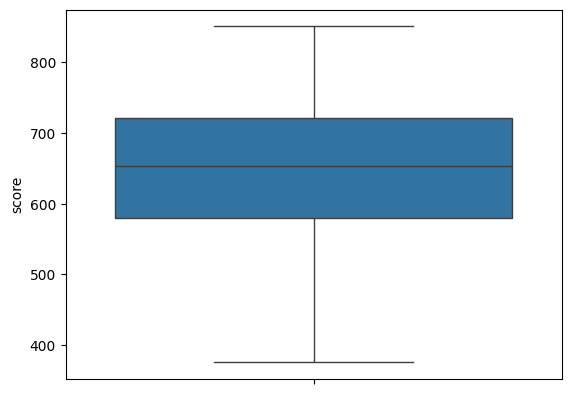

In [31]:
sns.boxplot(y=df['score'])
plt.show()

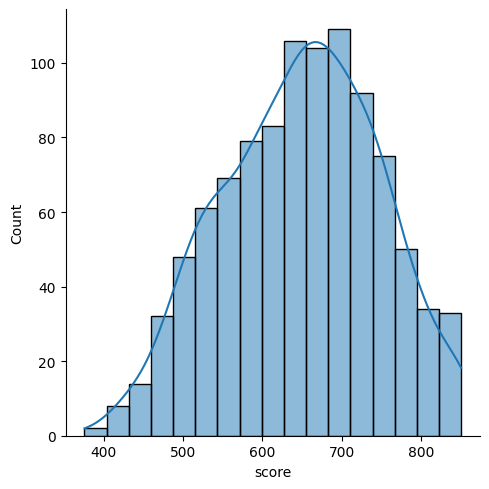

In [34]:
sns.displot(df['score'], kde=True)

In [ ]:
df['idade'].describe()
# Idade negativa e idade muito alta (maior que 120 anos) são dados inválidos.

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: idade, dtype: float64

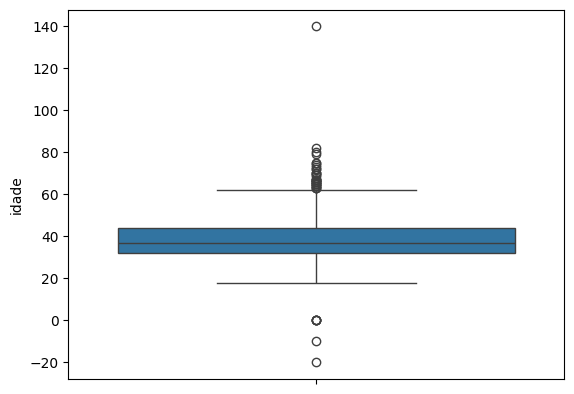

In [37]:
sns.boxplot(y=df['idade'])
plt.show()

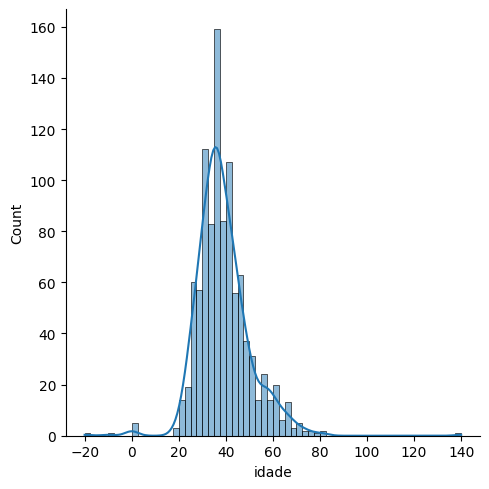

In [38]:
sns.displot(df['idade'], kde=True)
plt.show()

In [39]:
df['saldo'].describe()  

count    9.990000e+02
mean     7.164928e+06
std      6.311840e+06
min      0.000000e+00
25%      0.000000e+00
50%      8.958835e+06
75%      1.258684e+07
max      2.117743e+07
Name: saldo, dtype: float64

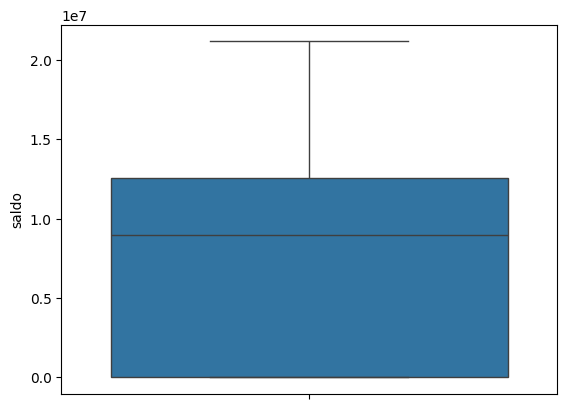

In [40]:
sns.boxplot(y=df['saldo'])
plt.show()

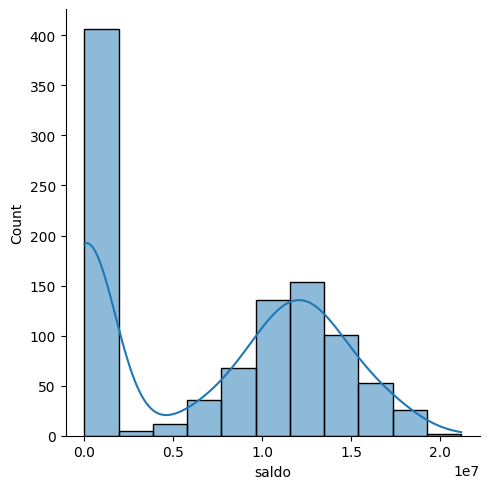

In [41]:
sns.displot(df['saldo'], kde=True)
plt.show()

In [43]:
df['salario'].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: salario, dtype: float64

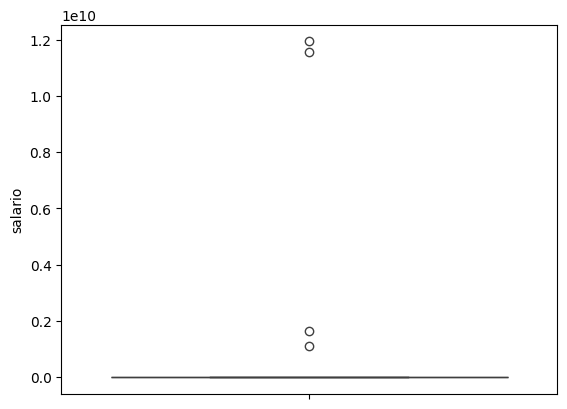

In [44]:
sns.boxplot(y=df['salario'])
plt.show()

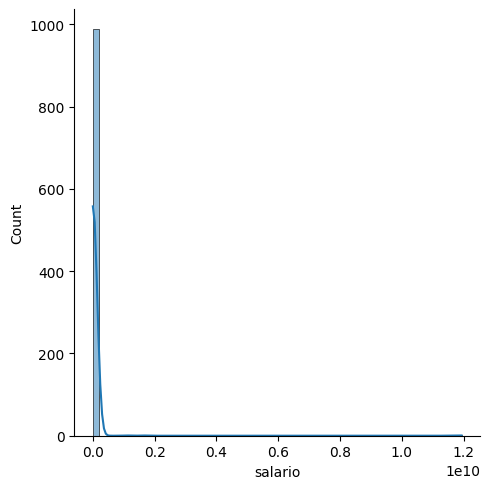

In [45]:
sns.displot(df['salario'], kde=True)
plt.show()

In [46]:
df.isnull().sum()

id                    0
score                 0
estado                0
genero                8
idade                 0
patrimonio            0
saldo                 0
produtos              0
tem_cartao_credito    0
ativo                 0
salario               7
saiu                  0
dtype: int64

In [47]:
df['salario'].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: salario, dtype: float64

In [48]:
mediana = sts.median(df['salario'])
mediana

70518.0

In [60]:
df['salario'].fillna(mediana, inplace=True)

C:\Users\pedro\AppData\Local\Temp\ipykernel_12988\2851210492.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['salario'].fillna(mediana, inplace=True)


In [51]:
df['salario'].isnull().sum()

np.int64(0)

In [52]:
agrupado = df.groupby('genero').size()
agrupado

genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

In [53]:
df['genero'].isnull().sum()

np.int64(8)

In [58]:
# preencher valores nulos com a moda (Masculino)
df['genero'].fillna('Masculino', inplace=True)

In [61]:
df['genero'].isnull().sum()

np.int64(0)

In [62]:
df.loc[df['genero'] == 'M', 'genero'] = 'Masculino'
df.loc[df['genero'].isin(['Fem','F']), 'genero'] = 'Feminino'

agrupado = df.groupby('genero').size()
agrupado

genero
Feminino     464
Masculino    535
dtype: int64

In [63]:
df['idade'].describe()


count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: idade, dtype: float64

In [64]:
df.loc[(df['idade'] < 0) | (df['idade'] > 120)]

,id,score,estado,genero,idade,patrimonio,saldo,produtos,tem_cartao_credito,ativo,salario,saiu
867,869,636,RS,Feminino,-10,1,17083346,1,1,0,11051028.0,1
984,986,773,RS,Masculino,-20,1,12453278,2,0,1,1172357.0,0
990,992,655,RS,Masculino,140,5,93147,2,1,0,6621413.0,0


In [65]:
mediana = sts.median(df['idade'])
mediana

37

In [66]:
df.loc[(df['idade'] < 0) | (df['idade'] > 120), 'idade'] = mediana

In [67]:
df.loc[(df['idade'] < 0) | (df['idade'] > 120)]

,id,score,estado,genero,idade,patrimonio,saldo,produtos,tem_cartao_credito,ativo,salario,saiu


In [73]:
df[df.duplicated(['id'], keep=False)]   

,id,score,estado,genero,idade,patrimonio,saldo,produtos,tem_cartao_credito,ativo,salario,saiu
80,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0
81,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0


In [74]:
df.drop_duplicates(subset=['id'], keep='first', inplace=True)
df[df.duplicated(['id'], keep=False)]   

,id,score,estado,genero,idade,patrimonio,saldo,produtos,tem_cartao_credito,ativo,salario,saiu


In [75]:
agrupado = df.groupby(['estado']).size()
agrupado

estado
PR    257
RP      1
RS    477
SC    258
SP      4
TD      1
dtype: int64

In [76]:
# Substituir os estados inválidos pela moda (RS)
df.loc[df['estado'].isin(['SP', 'RP', 'TD']), 'estado'] = 'RS'

In [77]:
agrupado = df.groupby(['estado']).size()
agrupado

estado
PR    257
RS    483
SC    258
dtype: int64

In [78]:
# Outliers em salário
desv = sts.stdev(df['salario'])
desv

528988918.4679201

In [79]:
df.loc[df['salario'] > 2 * desv]

,id,score,estado,genero,idade,patrimonio,saldo,produtos,tem_cartao_credito,ativo,salario,saiu
7,8,376,PR,Feminino,29,4,11504674,4,1,0,1.193469e+10,1
116,118,668,PR,Feminino,37,6,1678644,1,1,0,1.156383e+10,0
170,172,484,RS,Feminino,29,4,13011439,1,1,0,1.640179e+09,0
230,232,673,RS,Masculino,72,1,0,2,0,1,1.119812e+09,0


In [80]:
mediana = sts.median(df['salario'])
mediana

8637195.5

In [81]:
df.loc[df['salario'] > 2 * desv, 'salario'] = mediana
df.loc[df['salario'] > 2 * desv]

,id,score,estado,genero,idade,patrimonio,saldo,produtos,tem_cartao_credito,ativo,salario,saiu


In [ ]:
df.head()

,id,score,estado,genero,idade,patrimonio,saldo,produtos,tem_cartao_credito,ativo,salario,saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [83]:
df.shape

(998, 12)